# Data Wrangling

<font color = 'blue'>The notebook is the beginning of Fraud detection project and I have imported 1,00,000 observations for now. There are basic data wrangling and cleaning operations which are performed in order to make the data suited for further analysis.</font>

### Import all required packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Importing the file with 1,00,000 rows

In [2]:
file = r'PS_20174392719_1491204439457_log.csv'
df = pd.read_csv(file, nrows = 100000)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Features Information
					
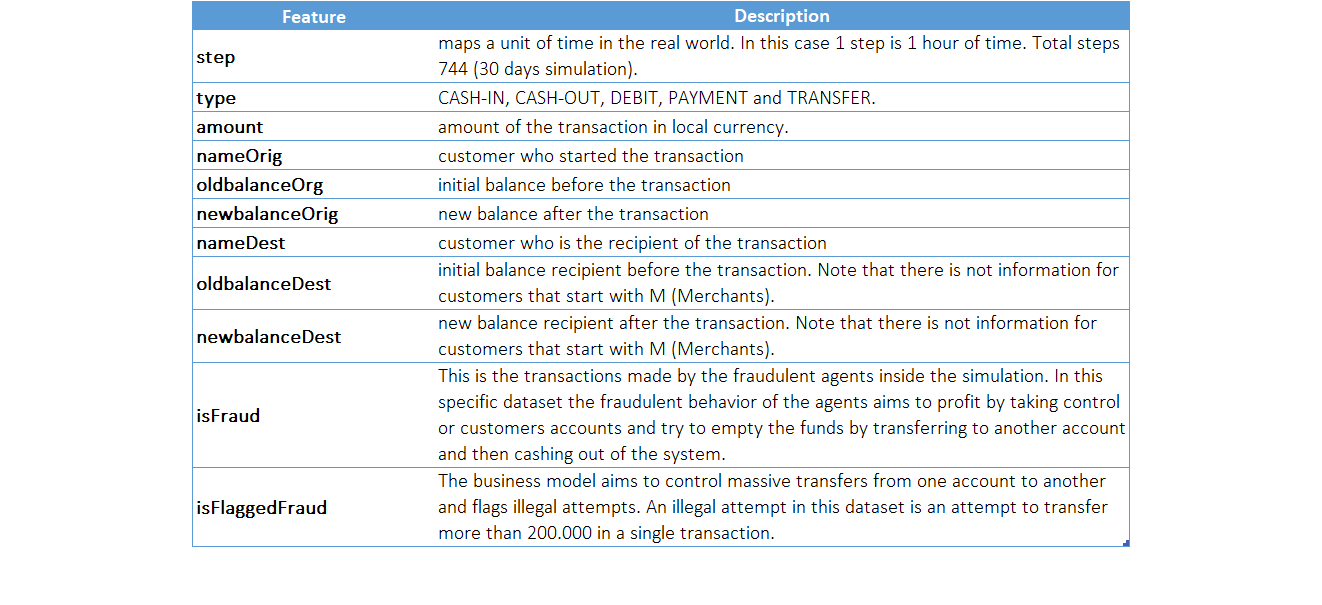

<font color = 'blue'>After import of file, we understand different aspects of the dataframe like shape, duplicates and column information to better understand if data cleaning, manipulation is required. 

By looking at the dataset it seems like we need to convert string columns into categorical

In [3]:
df.shape

(100000, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


In [5]:
df['step'] = df['step'].astype('category')
df['type'] = df['type'].astype('category')
df['isFraud'] = df['isFraud'].astype('category')
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype('category')


In [6]:
df['nameOrig'] = df['nameOrig'].astype('string')
df['nameDest'] = df['nameDest'].astype('string')


In [7]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   step            100000 non-null  category
 1   type            100000 non-null  category
 2   amount          100000 non-null  float64 
 3   nameOrig        100000 non-null  string  
 4   oldbalanceOrg   100000 non-null  float64 
 5   newbalanceOrig  100000 non-null  float64 
 6   nameDest        100000 non-null  string  
 7   oldbalanceDest  100000 non-null  float64 
 8   newbalanceDest  100000 non-null  float64 
 9   isFraud         100000 non-null  category
 10  isFlaggedFraud  100000 non-null  category
dtypes: category(4), float64(5), string(2)
memory usage: 5.7 MB


<font color = 'blue'>Checking the number of distinct values for all features and the count of observations for different types of transactions and Fraud/Non-Fraud features

In [9]:
print(df.nunique())

step                  10
type                   5
amount             99470
nameOrig          100000
oldbalanceOrg      58013
newbalanceOrig     48118
nameDest           51551
oldbalanceDest     53663
newbalanceDest     19158
isFraud                2
isFlaggedFraud         1
dtype: int64


In [10]:
df['type'].value_counts()

PAYMENT     39512
CASH_OUT    30718
CASH_IN     20185
TRANSFER     8597
DEBIT         988
Name: type, dtype: int64

In [11]:
df['isFraud'].value_counts()

0    99884
1      116
Name: isFraud, dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,100000.0,1.736022e+05,3.443003e+05,0.32,9963.5625,52745.52,211763.150,10000000.00
oldbalanceOrg,100000.0,8.777575e+05,2.673284e+06,0.00,0.0000,20061.50,190192.025,33797391.55
newbalanceOrig,100000.0,8.940619e+05,2.711318e+06,0.00,0.0000,0.00,214813.250,34008736.98
oldbalanceDest,100000.0,8.805048e+05,2.402267e+06,0.00,0.0000,20839.43,588272.375,34008736.98
newbalanceDest,100000.0,1.184041e+06,2.802350e+06,0.00,0.0000,49909.18,1058186.155,38946233.02


In [13]:
df.to_csv('fraud_detection.csv')